# 简单心理的心理咨询师资料分析

抓取简单心理网站上[在线心理咨询师页面](https://www.jiandanxinli.com/experts/)所有咨询师的资料，并进行简单统计分析。

In [1]:
import pandas as pd

In [2]:
# 读取用 scrapy 抓取下来的数据
df = pd.read_csv('counselors.csv')
df.head()

,name,location,zx_type,price,url,info
0,刘婧恒,南京,面对面咨询、视频咨询,600 元/次,/experts/135,"教育经历：, 台湾彰化师范大学辅导与谘商在读博士;, ..."
1,李亚,"武汉、湖北, 中国",面对面咨询、视频咨询,400 元/次,/experts/48820,"国家二级心理咨询师,精神动力取向心理咨询师,儿童游戏治疗师,心理专栏撰稿人,持续接受个人..."
2,樊书慧,北京,视频咨询,300 元/次,/experts/369682,"美国国家认证心理咨询师 (NCC),美国弗吉尼亚州注册咨询师(LPC-R),国家认证三级咨询..."
3,罗晓禹,"沈阳, 辽宁, 中国",面对面咨询、视频咨询,300 元/次,/experts/8858,在决定如何解决问题之前，我们更需要想清楚的是，我们面临的问题到底是什么，是什么造成了我们...
4,吴园,"南京, 江苏, 中国",面对面咨询、视频咨询,800 元/次,/experts/4697,"日本神户大学医学博士（2002年毕业）,中国心理学会注册心理师（X-17-067）,精神分析..."


In [3]:
# 补全 url 链接
df['url'] = 'http://jiandanxinli.com'+df['url']

In [4]:
# 备份数据
df.to_csv('con.csv', index=False)

In [5]:
# 重新加载手动微调的数据
df = pd.read_csv('jdxl_experts.csv')

## 分析咨询师的价格

In [6]:
# 去掉价格列多余字符并转成数字
df['price'] = df['price'].str.rstrip('元/次').apply(pd.to_numeric)
df.head()

,name,location,zx_type,price,url,info
0,刘婧恒,南京,面对面咨询、视频咨询,600,http://jiandanxinli.com/experts/135,"教育经历：, 台湾彰化师范大学辅导与谘商在读博士;, ..."
1,李亚,"武汉、湖北, 中国",面对面咨询、视频咨询,400,http://jiandanxinli.com/experts/48820,"国家二级心理咨询师,精神动力取向心理咨询师,儿童游戏治疗师,心理专栏撰稿人,持续接受个人..."
2,樊书慧,北京,视频咨询,300,http://jiandanxinli.com/experts/369682,"美国国家认证心理咨询师 (NCC),美国弗吉尼亚州注册咨询师(LPC-R),国家认证三级咨询..."
3,罗晓禹,"沈阳, 辽宁, 中国",面对面咨询、视频咨询,300,http://jiandanxinli.com/experts/8858,在决定如何解决问题之前，我们更需要想清楚的是，我们面临的问题到底是什么，是什么造成了我们...
4,吴园,"南京, 江苏, 中国",面对面咨询、视频咨询,800,http://jiandanxinli.com/experts/4697,"日本神户大学医学博士（2002年毕业）,中国心理学会注册心理师（X-17-067）,精神分析..."


In [7]:
# 价格基本信息统计
df['price'].describe() 

count     489.000000
mean      570.932515
std       262.210741
min       100.000000
25%       400.000000
50%       500.000000
75%       600.000000
max      3000.000000
Name: price, dtype: float64

In [8]:
print("平均价格：{:.1f}元 \n最高价格：{}元 \n最低价格：{}元".format(df['price'].mean(),
                                                              df['price'].max(),
                                                              df['price'].min()))

平均价格：570.9元 
最高价格：3000元 
最低价格：100元


In [9]:
# 价格最高的那位
df.loc[df['price'].idxmax()] 

name                                                       叶斌
location                                               上海, 中国
zx_type                                                   NaN
price                                                    3000
url                    http://jiandanxinli.com/experts/131237
info          简单心理学院特约督导师，为咨询师提供督导。,华东师范大学心理学博士 / 原任华东师范大学...
Name: 27, dtype: object

In [10]:
# 价格最低的那位
df.loc[df['price'].idxmin()]

name                                                       马艳
location                                               北京, 中国
zx_type                                            面对面咨询、视频咨询
price                                                     100
url                    http://jiandanxinli.com/experts/111348
info        马艳，女，1978年出生，已婚，两个孩子的母亲。,北京师范大学发展与教育心理学硕士(2001...
Name: 473, dtype: object

## 统计咨询师介绍里的词频

### 1.用 Counter 统计

In [11]:
import jieba
import re
from collections import Counter

In [12]:
# 单独导出咨询师介绍列
df['info'].to_csv('info.txt')

In [13]:
with open('info.txt', 'r') as f:
    text = f.read()

wordlist = Counter()
words = jieba.cut(text)

for word in words:
    if len(word) > 1: #& re.match(u'([\u4e00-\u9fff]+)', word):
        wordlist[word] += 1

def gen_cloud_word():
    words = []
    for word,cnt in wordlist.most_common(30):
        words.append(word)
    return words
#         print("{}:{}".format(word,cnt))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/_b/ft7j2n4j7gj9h55ft0gb9d2c0000gn/T/jieba.cache
Loading model cost 1.328 seconds.
Prefix dict has been built succesfully.


In [14]:
cloud_words = gen_cloud_word()
cloud_words

['心理咨询',
 '咨询',
 '心理',
 '培训',
 '督导',
 '精神分析',
 '治疗',
 '接受',
 '心理学',
 '小时',
 '工作',
 '自己',
 '个人',
 '团体',
 '来访者',
 '连续',
 '中国',
 '取向',
 '问题',
 '美国',
 '体验',
 '咨询师',
 '精神',
 '项目',
 '专业',
 '临床',
 '国家',
 '治疗师',
 '二级',
 '中心']

### 2. 用 wordcloud 包制作标签云

In [15]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np

In [16]:
d = path.dirname('info.txt')
# 设置字体
font = r'/Users/kidult/Library/Fonts/MFKeSong_Noncommercial-Regular.TTF'

# Read the whole text
text = open(path.join(d, 'info.txt')).read()

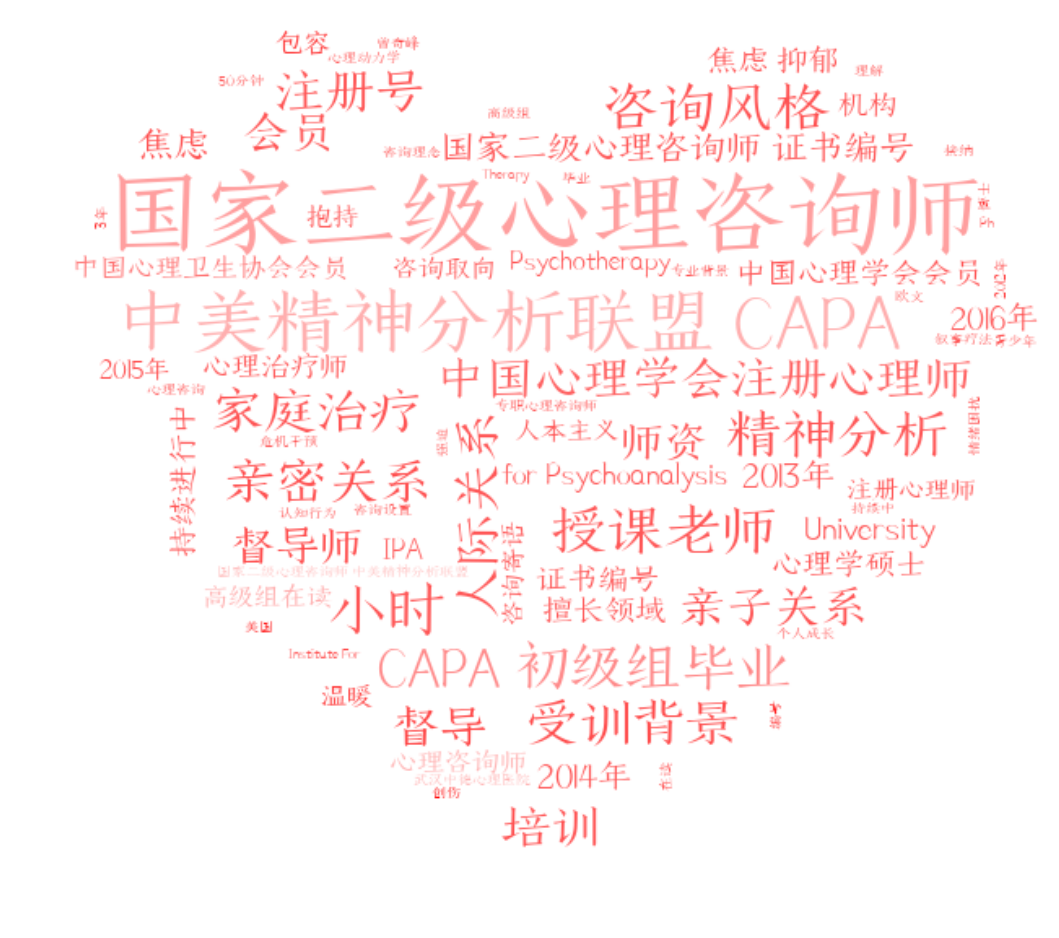

In [17]:
# 排除词
stopwords=('Dr','of','to','and','The','in','zx','至今','中国','同时','当然')

# 用图片截取并取色
heart_coloring = np.array(Image.open(path.join(d, "heart.png")))

# Generate a word cloud image
wordcloud = WordCloud(max_words=80, background_color='white', mask=heart_coloring,
                      max_font_size=60, relative_scaling=0.4, font_path=font,stopwords=stopwords, random_state=42)
wordcloud.generate(text)

image_colors = ImageColorGenerator(heart_coloring)


plt.figure(figsize=(12,8))
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
# plt.show()

---
2018-01-06 update by [kidult00](https://github.com/kidult00/)